In [88]:
# Python standard library imports
import copy
from itertools import count
import math
import random
import sys
import csv
# 3rd party imports
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

#testing making changes

In [7]:
def colorful_vertex_plot(G, pos, attr, node_size = 75, cmap = plt.cm.jet, plot_title = ''):
    """ 
    A function that plots nx_graphs colored by attribute
    
    Args:
        G (nx object) ==> a graph
        pos (dict) ==> items map node to (x,y) where node is a node in the graph and (x,y) is the coordinate where that node will be plotted
        attr (string) ==> the node attribute to color by, will almost always be "district"
        node_size (int) ==> the size of the nodes in the plot
        cmap (pyplot object) ==> the color map/color ramp to be used to color the nodes. probably no need to change
        plot_title (string) ==> the title, if you want one
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    ax.set_title(plot_title)
    ax.axis('Off')
    groups = set(nx.get_node_attributes(G, attr).values())
    mapping = dict(zip(sorted(groups),count()))
    nodes = G.nodes()
    colors = [mapping[G.node[n][attr]] for n in nodes]
    ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, with_labels=False, node_size = node_size, cmap = cmap)
    


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
done with run
done with file


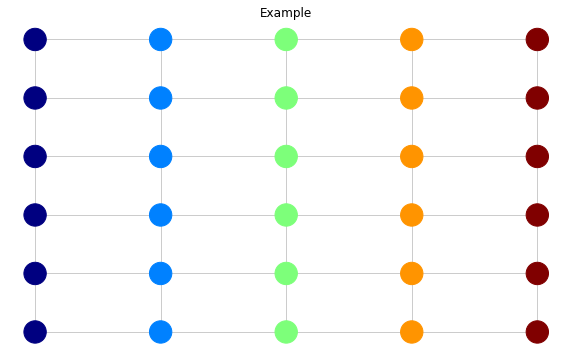

In [106]:
"""

This is an example showing how to use colorful_vertex_plot

"""

G = nx.grid_graph([6, 5]) #a 10x10 grid graph

G.nodes[(0,0)]['district'] = 1
G.nodes[(0,1)]['district'] = 1
G.nodes[(0,2)]['district'] = 1
G.nodes[(0,3)]['district'] = 1
G.nodes[(0,4)]['district'] = 1
G.nodes[(0,5)]['district'] = 1

G.nodes[(1,0)]['district'] = 0
G.nodes[(1,1)]['district'] = 0
G.nodes[(1,2)]['district'] = 0
G.nodes[(1,3)]['district'] = 0
G.nodes[(1,4)]['district'] = 0
G.nodes[(1,5)]['district'] = 0

G.nodes[(2,0)]['district'] = 2
G.nodes[(2,1)]['district'] = 2
G.nodes[(2,2)]['district'] = 2
G.nodes[(2,3)]['district'] = 2
G.nodes[(2,4)]['district'] = 2
G.nodes[(2,5)]['district'] = 2

G.nodes[(3,0)]['district'] = 4
G.nodes[(3,1)]['district'] = 4
G.nodes[(3,2)]['district'] = 4
G.nodes[(3,3)]['district'] = 4
G.nodes[(3,4)]['district'] = 4
G.nodes[(3,5)]['district'] = 4

G.nodes[(4,0)]['district'] = 3
G.nodes[(4,1)]['district'] = 3
G.nodes[(4,2)]['district'] = 3
G.nodes[(4,3)]['district'] = 3
G.nodes[(4,4)]['district'] = 3
G.nodes[(4,5)]['district'] = 3


G.nodes[(0,0)]['party'] = 1
G.nodes[(0,1)]['party'] = 1
G.nodes[(0,2)]['party'] = 1
G.nodes[(0,3)]['party'] = 1
G.nodes[(0,4)]['party'] = 1
G.nodes[(0,5)]['party'] = 1

G.nodes[(1,0)]['party'] = 0
G.nodes[(1,1)]['party'] = 0
G.nodes[(1,2)]['party'] = 0
G.nodes[(1,3)]['party'] = 0
G.nodes[(1,4)]['party'] = 0
G.nodes[(1,5)]['party'] = 0

G.nodes[(2,0)]['party'] = 1
G.nodes[(2,1)]['party'] = 0
G.nodes[(2,2)]['party'] = 1
G.nodes[(2,3)]['party'] = 1
G.nodes[(2,4)]['party'] = 0
G.nodes[(2,5)]['party'] = 0

G.nodes[(3,0)]['party'] = 0
G.nodes[(3,1)]['party'] = 0
G.nodes[(3,2)]['party'] = 1
G.nodes[(3,3)]['party'] = 0
G.nodes[(3,4)]['party'] = 1
G.nodes[(3,5)]['party'] = 1

G.nodes[(4,0)]['party'] = 0
G.nodes[(4,1)]['party'] = 0
G.nodes[(4,2)]['party'] = 1
G.nodes[(4,3)]['party'] = 0
G.nodes[(4,4)]['party'] = 1
G.nodes[(4,5)]['party'] = 1


for node in G.nodes():
    first_coord = node[0] #This reads the first coordinate of each node
    G.node[node]['district'] = first_coord #this gives each node a district attribute---district = node[0]
    
pos = {node:node for node in G.nodes} #This is a silly piece of code. colorful_vertex_plot takes an argument
#pos, which is a dictionary teliing the functino where to plot each node. I've set pos to be a dictionary 
#where the key value pairs are node:node for node in G.nodes. This works because when nx makes a grid graph, the
#name of the node IS the position of the node. (This code should work whenever you use a grid graph.)

colorful_vertex_plot(G, pos = pos, attr = 'district', node_size = 500, cmap = plt.cm.jet, plot_title = 'Example')
chainStats = chain_run(100, G)
print('done with run')
format_chain_data(chainStats)
print('done with file')

In [20]:
def identify_boundary_nodes(G):
    """ 
    Should return a list of tuples (p, D) 
    where the p is a precinct and D is a district 
    which does not contain p but is adjacent to it
    
    Note: This will only be used once to get the boundary nodes
    on the initial districting plan
    
    Args:
        G (nx object) ==> a networkx object/graph
        
    Returns:
        List of tuples (p, D)
    """
   
    mylist = []
    numD = 0
    index = 0
    districts = []
    districts_size = []
    district_cords = [0,[]]
    precinct_list = []
    combined_list = []
    
    precinct_points = []
   
    #Generate all data pertaining to the districts, such as [distrct number, precinct count] 
    #as well as genereates a list of [each district , [every coordinate point in that disrict]].
    
    
    for node in G.nodes():
        
        
        if G.nodes[node]['district'] not in districts:
            districts.append(G.nodes[node]['district'])
            index = G.nodes[node]['district']
            district_cords = [index,precinct_points]
            precinct_list.append(district_cords)
            size_list = [index,0]
        
            districts_size.append(size_list)
        
            del district_cords
            del size_list
       

        if G.nodes[node]['district'] in districts:
            
            for i in range(len(districts_size)):
                district_check = districts_size[i]
                current_precinct = precinct_list[i]
                district_num = district_check[0]
                
                
                    
               
                if G.nodes[node]['district'] == district_num:   
                    my_list = district_check
                    my_list[1] =  my_list[1] + 1
                    
                    districts_size[i] = my_list 
                    
                    my_list_1 = current_precinct[1].copy()
                    my_list_1.append(node)
                    precinct_list[i] = [current_precinct[0],my_list_1]
                    
     
     #creates the tuple containing a boundary node and its adjacent district     
        for neighbor in G.neighbors(node):  
            if G.nodes[node]['district'] != G.nodes[neighbor]['district']:
                myTuple = (node,G.nodes[neighbor]['district']);
                mylist.append(myTuple)
                del myTuple
       
    #This is the over-arching list that stores all the info we need to pass throughout the program
    
    combined_list.append(mylist)
    combined_list.append(districts_size)
    combined_list.append(len(districts_size))
    combined_list.append(precinct_list)
    
    
            
    return combined_list

In [80]:
def is_valid_swap(G, combined_List, pD_tuple, pop_param):
        """ 
    Reassigns precinct p to district D and 
    returns True if resulting plan has all districts contiguous and satifies the population deviation requirement
    returns False otherwise
    
    Args:
        G (nx object) ==> same as above in identify_boundary_nodes
        pD_tuple (tuple) ==> random tuple selected from the list returned by identify_boundary_nodes
        pop_param (decimal) ==> decimal that indicates the allowable population deviation between districts
    
    Returns: True or False
        
    """

        #grabs all data from our big list
        districts_size =  combined_List[1] 
        numD = combined_List[2]
        precinct_locations = copy.deepcopy(combined_List[3])
        
        #create the average district and basing the population parameters around it forming up/low bounds
        average_district_amount = len(G)/numD
        
        population_dev = average_district_amount * pop_param
        
        #if you want to make the range tighter use floor for both or ceil for both
        top_range = math.ceil(population_dev + average_district_amount)
        bottom_range = math.floor(average_district_amount - population_dev)
        
        p = pD_tuple[0]
        D = pD_tuple[1]
        
    
        #gets the count of the current nodes district
        for i in range(len(districts_size)):
            my_district = districts_size[i]
            if(G.nodes[p]['district'] == my_district[0]):
                current_district_size = my_district[1]
            
        
        copy_D = G.nodes[p]['district']
       
        #does the faux swap
        G.nodes[p]['district'] = D
        
        #gets the count of the adjacent district to the current node
        for i in range(len(districts_size)):
            my_district = districts_size[i]
            if(G.nodes[p]['district'] == my_district[0]):
                adj_district_size = my_district[1]
    
   #update counts accordingly to the affected districts 
        adj_district_size = adj_district_size + 1
        
        current_district_size =  current_district_size - 1
        
        
    #population devation check , stops program if not met, does not go to continuity check.   
        if(adj_district_size > top_range):
            return False
        if(current_district_size < bottom_range):
            return False

        
        #CONTIGUOUS CHECK using subgraphs of the original graph
        #compares all nodes in one district to see if the chain is broken
        
        for j in range(len(precinct_locations)):
            my_locations = precinct_locations[j]
       
            if(copy_D == my_locations[0]):
                for i in my_locations[1]:
                    if(p == i):
                        my_locations[1].remove(i)
                my_district_subpoints = my_locations[1]       
            
            if(D == my_locations[0]):
                my_locations[1].append(p)
        
        subGraph = G.subgraph(my_district_subpoints)
        
        flag = nx.is_connected(subGraph)
            
        #returning our truth value 
        return flag


In [81]:
def update_swaps(G, combined_List, pD_tuple):
    """ 
    Updates the list of (p, D) tuples for graph G where p has been reassigned to district D
    
    Note: This doesn't require iterating through all nodes.
    
    Args:
        G (nx object)
        pD_tuple (tuple)
        
    Returns:
        List of (p, D) tuples
    """
    """
    Notes:
    New graph old swaps list 
    Only need to check neighbors of swap and the swap itself 
    take old swaps list remove any touple that has p or neighbor of p 
    recompute the boundaries 
    
    Combined List:
    [0] bounary nodes #fix - planned
    [1] size districts #fix - think done
    [2] number districts #wont change
    [3] nodes in each district #fix - think done
    """
    p = pD_tuple[0]
    D = pD_tuple[1]
    original_D = G.nodes[p]['district']
    copy_combined_List = copy.deepcopy(combined_List)
    boundary_nodes = copy_combined_List[0]
    size_districts = copy_combined_List[1]
    numD = copy_combined_List[2]
    nodes_in_district = copy_combined_List[3]

    
    temp_boundary_list = []
    temp_tuples = []
    
    for i in range(len(boundary_nodes)):
        if boundary_nodes[i] == pD_tuple:
            temp_tuples.append(boundary_nodes[i])
 
        for neighbor in G.neighbors(p):
            if boundary_nodes[i][0] == G.nodes[neighbor]:
                temp_tuples.append(boundary_nodes[i])
    
    for i in range(len(boundary_nodes)):
        for j in range(len(temp_tuples)):
            if boundary_nodes[i] != temp_tuples[j]:
                temp_boundary_list.append(boundary_nodes[i])
    
    #go through the list of nodes removed determine if they are still boundary nodes Note:will involve p and neighbors and
    #the neighbors of the neighbors 
    for i in range(len(temp_tuples)):
        current_node = temp_tuples[i][0]
        for neighbor in G.neighbors(current_node):  
            if G.nodes[current_node]['district'] != G.nodes[neighbor]['district']:
                myTuple = (current_node,G.nodes[neighbor]['district']);
                temp_boundary_list.append(myTuple)
                del myTuple
 
    
    for i in range(numD):
        if size_districts[i][0] == original_D:
            size_districts[i][1] = size_districts[i][1] - 1
        if size_districts[i][0] == D:
            size_districts[i][1] = size_districts[i][1] + 1

        if nodes_in_district[i][0] == original_D:
            nodes_in_district[i][1].remove(p) 
        if nodes_in_district[i][0] == D:
            nodes_in_district[i][1].append(p)
    
    copy_combined_List[0] = temp_boundary_list
    
    return copy_combined_List 

In [100]:
def chain_run(N, G):
    """
    The main while loop.
    
    Args:
        N (int) ==> number of steps to do in the chain
        G (networkx object) ==> initial districting plan 
    """
    
    chainStats = []
    perspective = 1
    
    combined_List = identify_boundary_nodes(G)
    
    #to be used in our seats and score data collection
    sizeD = combined_List[1]
    numD = combined_List[2]
    votes = vote_counter(G, numD)
    minWin = min_to_win(sizeD)
        
    #collecting data on the plans in the run
    tdata = (seats(perspective, minWin, votes), score(effgap(G, perspective, minWin, votes), fairness(perspective, votes, minWin, numD), compact(G, combined_List)))
    chainStats.append(tdata)
    del tdata
      
    heads = 1
    pop_params = 0.01
    
    t=0
    while t < N:
        t+=1
        print(t)
        
        pD_tuple = random.choice(combined_List[0])
        p = pD_tuple[0]
        D = pD_tuple[1]

        proposal_G = copy.deepcopy(G)
        # The above makes a temporary copy of G, which we'll call proposal_G
        swap_is_valid = is_valid_swap(proposal_G, combined_List, pD_tuple, pop_params)
        if  swap_is_valid == False:
            continue
            #If making the swap results in an invalid districting plan, we continue to the next iteration of the loop
        else:
            proposal_swaps = update_swaps(G, combined_List, pD_tuple)
        
        p = min((len(combined_List[0]) / len(proposal_swaps[0])), 1)
        #flip a coin with probability p of heads, this will return either a 1 or 0, returning a 1 is heads
        result = np.random.binomial(1, p)
        
        if result == heads:
            G = proposal_G
            combined_List = proposal_swaps
            
            #to be used in our seats and score data collection
            sizeD = combined_List[1]
            numD = combined_List[2]
            votes = vote_counter(G, numD)
            minWin = min_to_win(sizeD)
        
            #collecting data on the plans in the run
            tdata = (seats(perspective, minWin, votes), score(effgap(G, perspective, minWin, votes), fairness(perspective, votes, minWin, numD), compact(G, combined_List)))
            chainStats.append(tdata)
            del tdata
                 
    return chainStats

In [24]:
"""
Args:
    effgap ==> (decimal) output of our efficiency gap function
    fairness ==> (decimal) output of our fairness function
    compact ==> (decimal) output of our compactness function
    
This function calculates and returns our gerrymandering score.
"""
def score(effgap, fairness, compact):
    return (1/3) * effgap + (1/3) * fairness + (1/3) * compact
    

In [92]:
"""
Args:
    chainStats ==> (list of tuples) The tuples is located at the plan # (index in the list) it is calculated from
                                    index 0 of the tuple is seats
                                    index 1 of the tuple is score
                                        
This function inputs the data in the list chainStats to our CSV file.
"""
def format_chain_data(chainStats):
    outfile = open('chainrunStats.csv', 'w')
    
    outfile_writer = csv.writer(outfile, delimiter = ',', lineterminator='\n')
    outfile_writer.writerow(['plan_number', 'seats', 'score'])
    
    for i in range(len(chainStats)):
        temp_tuple = chainStats[i]
        outfile_writer.writerow([str(i), str(temp_tuple[0]), str(temp_tuple[1])])
        del temp_tuple
    
    outfile.close()

In [22]:
"""
Args: 
    sizeD ==> (list) the list of the size of each district (index)
    
This function calculates the minimum votes to win in each district. It returns a list. District 0 minimum votes to win 
could be found at the index 0 in the list that is returned, the other districts corresponded as such.
"""
def min_to_win(sizeD):
    minWin = [None] * len(sizeD)
    
    for j in range(len(sizeD)):
        if (sizeD[j][1] % 2 == 0):
            #since the size of district is even to win rather than tie you need one more vote than half the size
            temp = (sizeD[j][1] / 2) + 1
            index = sizeD[j][0]
            minWin[index] = temp
        else: 
            #since size is odd you need to round up to the nearest integer to get the minimum to win
            temp = math.ceil(sizeD[j][1] / 2)
            index = sizeD[j][0]
            minWin[index] = temp
    return minWin

In [17]:
"""
Args:
    G ==> (networkx graph) the districting plan
    numD ==> (int) the number of districts in the plan
    
This function counts the votes for both parties recieved in each district and returns a tuple of two lists. 
"""
def vote_counter(G, numD):
    votes_B = []
    votes_R = []
    votes = (votes_B, votes_R)
    
    countR = 0 
    countB = 0
    
    for district in range(numD):
        for node in G.nodes:
            if G.nodes[node]['district'] == district:
                if G.nodes[node]['party'] == 1: 
                    countR += 1
                else:
                    countB += 1
        votes_B.append(countB)
        votes_R.append(countR)
        
        countB = 0
        countR = 0
        
    return votes

In [16]:
"""
Args:
    perspective ==> (int) a 1 or 0 in our program 
                    1 refers to Red
                    0 refers to Blue
    minWin ==> (list) each index contains the minimum amount of votes to win that district (index)
    votes ==> (touple of two lists) index 0 contains list of votes for Blue (0) by district (index)
                                    index 1 contains list of votes for Red (1) by district (index) 
                                    
This function calculates the number of seats that the perspective party won in the districting plan.
"""
def seats(perspective, minWin, votes):
    #we only need the votes of the party we are calculating the # of seats won
    perspective_votes = votes[perspective]
    
    seats = 0
    for i in range(len(perspective_votes)):
        if minWin[i] <= perspective_votes[i]:
            seats += 1
    return seats

In [15]:
"""
Args:
    perspective ==> (int) a 1 or 0 in our program 
                    1 refers to Red
                    0 refers to Blue
    votes ==> (touple of two lists) index 0 contains list of votes for Blue (0) by district (index)
                                    index 1 contains list of votes for Red (1) by district (index)
    minWin ==> (list) each index contains the minimum amount of votes to win that district (index)                                    

This function calculates and returns a fairness measure using the formula (seats / numDistricts) / (popular vote). 
"""
def fairness(perspective, votes, minWin, numD):
    return (seats(perspective, minWin, votes)/ numD) / popvote(perspective, votes) 

In [14]:
""" 
Args:
    perspective ==> (int) a 1 or 0 in our program 
                    1 refers to Red
                    0 refers to Blue
    votes ==> (touple of two lists) index 0 contains list of votes for Blue (0) by district (index)
                                    index 1 contains list of votes for Red (1) by district (index)
    minWin ==> (list) each index contains the minimum amount of votes to win that district (index)

This function calculates the percentage of votes that a given party won in an election ie the popular vote.    
"""
def popvote(perspective, votes):
    return sum(votes[perspective]) / (sum(votes[0]) + sum(votes[1]))

In [26]:
"""
Args:
    perspective ==> (int) a 1 or 0 in our program 
                    1 refers to Red
                    0 refers to Blue 
    minWin ==> (list) each index contains the minimum amount of votes to win that district (index)
    votes ==> (touple of two lists) index 0 contains list of votes for Blue (0) by district (index)
                                    index 1 contains list of votes for Red (1) by district (index)
                                    

The function calculates and returns either (Rwasted - Bwasted) / Total Votes or (Bwasted - Rwasted) / Total Votes 
depending on the inputed perspective.
"""
def effgap(G, perspective, minWin, votes):
    totalvotes = G.number_of_nodes() 
    
    #get the list of votes for each party by district
    B_votes = votes[0]
    R_votes = votes[1]
    
    Bwasted = 0
    Rwasted = 0
    
    for i in range(len(B_votes)):
        #If R losses or there was a tie all R votes are wasted
        if R_votes[i] > B_votes[i]: 
            Rwasted += (R_votes[i] - minWin[i])
        else:
            Rwasted += R_votes[i]
        
        #If B losses or there was a tie all B votes are wasted
        if B_votes[i] > R_votes[i]:
            Bwasted += (B_votes[i] - minWin[i])
        else:
            Bwasted += B_votes[i]
            
        
    
    #efficiency gap calculations and one is the perspective of Red
    if perspective == 1:
        return (Rwasted - Bwasted) / totalvotes
    else:
        return (Bwasted - Rwasted) / totalvotes

In [13]:
"""
Args:
    G ==> (networkx graph) the districting plan
    combined_List ==> (List) this is a list of lists containing the data retrived from the districting plan. 
    
This function calculates a discrete compactness score using the Polsby Poper equation (4pi*area / perimeter^2).
"""
def compact(G, combined_List):
    numD = combined_List[2]
    boundary_nodes = combined_List[0]
    district_nodes = combined_List[3]
    
    compact_list = []
    
    for i in range(numD):
        area = 0
        perimeter = 0
        
        #the area is the number of nodes in the district
        area = len(district_nodes[i][1])
        
        #since the current district may not be the same as index i, we access which district we are in 
        district = district_nodes[i][0]
        nodes_in_district = district_nodes[i][1]
        
        for j in range(area):
            #this is the number of edges for the node we are currently at
            edge_count = len(G.edges(nodes_in_district[j]))
            #the following if statements add the edges to perimeter if they are border nodes not interior nodes
            if edge_count == 1:
                perimeter += 3
            if edge_count == 2:
                perimeter += 2
            if edge_count == 3:
                perimeter += 1
        
        for k in range(len(boundary_nodes)):
            #if the boundary node is in the list current district it is added to the perimeter
            if G.nodes[boundary_nodes[k][0]]['district'] == district:
                perimeter += 1

        temp_compact = (4 * math.pi * area) / pow(perimeter, 2)
        compact_list.append(temp_compact) 
        
    #the minimum of the list is the worst compactness in the districting plan
    return min(compact_list)